# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from Childers_api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
city = cities[0]
city

'port-aux-francais'

In [4]:
city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
response = requests.get(city_url)
city_weather = response.json()
city_weather

{'coord': {'lon': 70.2167, 'lat': -49.35},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 39.56,
  'feels_like': 29.98,
  'temp_min': 39.56,
  'temp_max': 39.56,
  'pressure': 1027,
  'humidity': 77,
  'sea_level': 1027,
  'grnd_level': 1026},
 'visibility': 10000,
 'wind': {'speed': 19.69, 'deg': 265, 'gust': 22.35},
 'clouds': {'all': 54},
 'dt': 1700661521,
 'sys': {'country': 'TF', 'sunrise': 1700608729, 'sunset': 1700664704},
 'timezone': 18000,
 'id': 1546102,
 'name': 'Port-aux-Français',
 'cod': 200}

In [8]:
city_lat = city_weather.get("coord", {}).get("lat", None)
city_lng = city_weather.get("coord", {}).get("lon", None)
city_max_temp = city_weather.get("main", {}).get("temp_max", None)
city_humidity = city_weather.get("main", {}).get("humidity", None)
city_clouds = city_weather.get("clouds", {}).get("all", None)
city_wind = city_weather.get("wind", {}).get("speed", None)
city_country = city_weather.get("sys", {}).get("country", None)
city_date = city_weather.get("dt", {})

In [9]:
# #Testing to see if values were pulled correctly
# {"City": city, 
#     "Lat": city_lat, 
#     "Lng": city_lng, 
#     "Max Temp": city_max_temp,
#     "Humidity": city_humidity,
#     "Cloudiness": city_clouds,
#     "Wind Speed": city_wind,
#     "Country": city_country,
#     "Date": city_date}

{'City': 'port-aux-francais',
 'Lat': -49.35,
 'Lng': 70.2167,
 'Max Temp': 39.56,
 'Humidity': 77,
 'Cloudiness': 54,
 'Wind Speed': 19.69,
 'Country': 'TF',
 'Date': 1700661521}

In [180]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[0:500]):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url)
    
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather.get("coord", {}).get("lat", None)
        city_lng = city_weather.get("coord", {}).get("lon", None)
        city_max_temp = city_weather.get("main", {}).get("temp_max", None)
        city_humidity = city_weather.get("main", {}).get("humidity", None)
        city_clouds = city_weather.get("clouds", {}).get("all", None)
        city_wind = city_weather.get("wind", {}).get("speed", None)
        city_country = city_weather.get("sys", {}).get("country", None)
        city_date = city_weather.get("dt", {})

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City {city} not found. Skipping city...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | petropavlovsk-kamchatsky
Processing Record 6 of Set 1 | 'ohonua
Processing Record 7 of Set 1 | khandyga
Processing Record 8 of Set 1 | mopti
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | alofi
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | taiohae
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | puerto francisco de orellana
Processing Record 19 of Set 1 | mandideep
Processing Record 20 of Set 1 | berdigestyakh
Processing Record 21 of Set 1 | vorgashor
Pr

Processing Record 43 of Set 4 | college
Processing Record 44 of Set 4 | saint-joseph
Processing Record 45 of Set 4 | nova olinda do norte
Processing Record 46 of Set 4 | happy valley-goose bay
Processing Record 47 of Set 4 | suva
Processing Record 48 of Set 4 | serhiyivka
Processing Record 49 of Set 4 | novohrad-volynskyi
Processing Record 0 of Set 5 | puerto san carlos
Processing Record 1 of Set 5 | pacocha
Processing Record 2 of Set 5 | noumea
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | margate
Processing Record 5 of Set 5 | portland
Processing Record 6 of Set 5 | bubaque
Processing Record 7 of Set 5 | boyolangu
Processing Record 8 of Set 5 | apolinario saravia
Processing Record 9 of Set 5 | sampaloc
Processing Record 10 of Set 5 | alotau
Processing Record 11 of Set 5 | afaahiti
Processing Record 12 of Set 5 | cedeira
Processing Record 13 of Set 5 | vernon
Processing Record 14 of Set 5 | utrik
Processing Record 15 of Set 5 | fort st. john
Processing R

Processing Record 38 of Set 8 | callao
Processing Record 39 of Set 8 | shirgaon
Processing Record 40 of Set 8 | evergreen
Processing Record 41 of Set 8 | chegdomyn
Processing Record 42 of Set 8 | middelburg
Processing Record 43 of Set 8 | newman
Processing Record 44 of Set 8 | port blair
Processing Record 45 of Set 8 | mbanza-ngungu
Processing Record 46 of Set 8 | palmer
Processing Record 47 of Set 8 | williams lake
Processing Record 48 of Set 8 | rawson
Processing Record 49 of Set 8 | raduzhny
Processing Record 0 of Set 9 | astoria
Processing Record 1 of Set 9 | kapsowar
Processing Record 2 of Set 9 | chernyshevskiy
Processing Record 3 of Set 9 | zabaykal'sk
Processing Record 4 of Set 9 | puerto aysen
Processing Record 5 of Set 9 | wakema
Processing Record 6 of Set 9 | arraial do cabo
Processing Record 7 of Set 9 | kingston
Processing Record 8 of Set 9 | magadan
Processing Record 9 of Set 9 | nguigmi
Processing Record 10 of Set 9 | qui nhon
Processing Record 11 of Set 9 | primero de m

In [186]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          500
Lat           476
Lng           476
Max Temp      476
Humidity      476
Cloudiness    476
Wind Speed    476
Country       476
Date          500
dtype: int64

In [187]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,39.06,80.0,72.0,19.64,TF,1700671988
1,bethel,41.3712,-73.4140,49.50,87.0,100.0,8.05,US,1700671483
2,thompson,55.7435,-97.8558,4.24,72.0,11.0,12.88,CA,1700671989
3,blackmans bay,-43.0167,147.3167,49.53,91.0,23.0,1.01,AU,1700671989
4,petropavlovsk-kamchatsky,53.0452,158.6483,24.46,73.0,20.0,23.00,RU,1700671989


In [188]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities_Childers.csv", index_label="City_ID")

In [189]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities_Childers.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,39.06,80.0,72.0,19.64,TF,1700671988
1,bethel,41.3712,-73.4140,49.50,87.0,100.0,8.05,US,1700671483
2,thompson,55.7435,-97.8558,4.24,72.0,11.0,12.88,CA,1700671989
3,blackmans bay,-43.0167,147.3167,49.53,91.0,23.0,1.01,AU,1700671989
4,petropavlovsk-kamchatsky,53.0452,158.6483,24.46,73.0,20.0,23.00,RU,1700671989


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

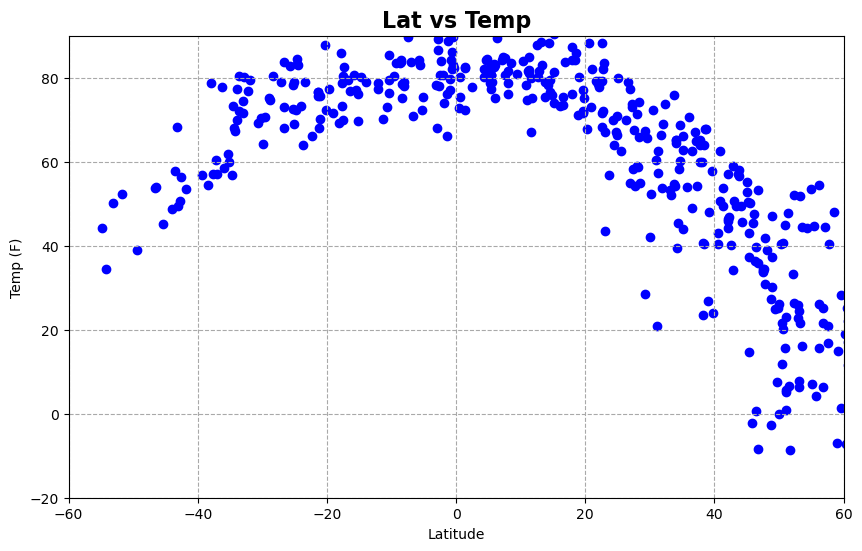

In [190]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Max Temp"], color="blue")
plt.xlabel("Latitude")
plt.ylabel("Temp (F)")
plt.title("Lat vs Temp", fontweight="bold", fontsize=16)
plt.xlim((-60, 60))
plt.ylim((-20, 90))
plt.grid(color="darkgrey", alpha=1, linestyle="--")

# Save the figure
plt.savefig("output_data/lat_temp_Childers.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

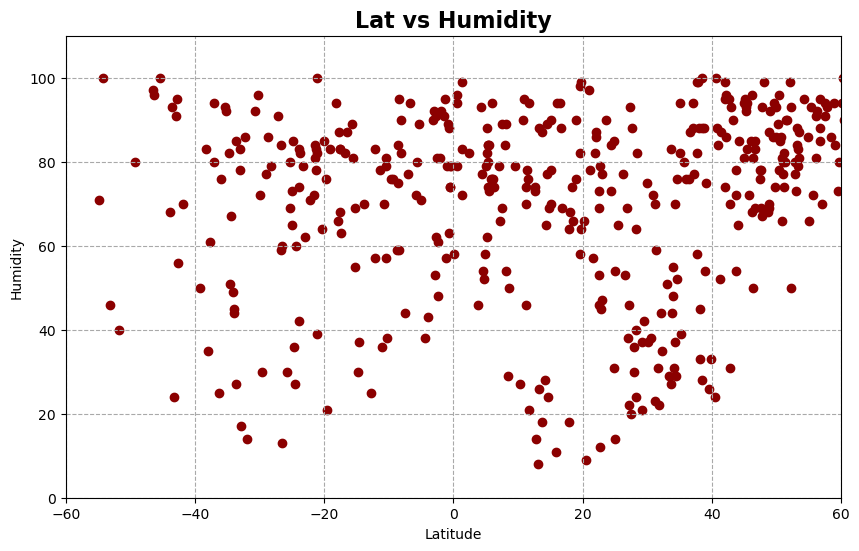

In [191]:
# Build scatter plot for latitude vs. humidity
# Incorporate the other graph properties
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df.Humidity, color="darkred")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Lat vs Humidity", fontweight="bold", fontsize=16)
plt.xlim((-60, 60))
plt.ylim((0, 110))
plt.grid(color="darkgrey", alpha=1, linestyle="--")

# Save the figure
plt.savefig("output_data/lat_humidity_Childers.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

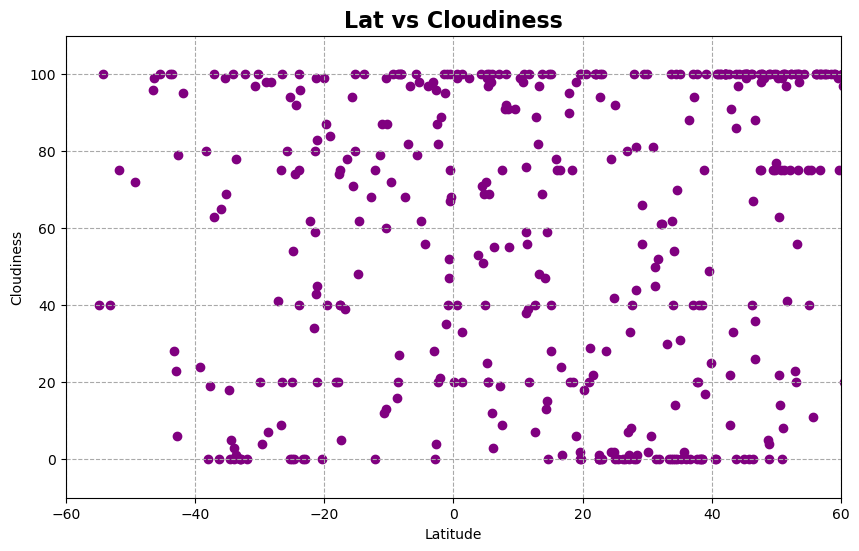

In [193]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df.Cloudiness, color="purple")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Lat vs Cloudiness", fontweight="bold", fontsize=16)
plt.xlim((-60, 60))
plt.ylim((-10, 110))
plt.grid(color="darkgrey", alpha=1, linestyle="--")

# Save the figure
plt.savefig("output_data/lat_clouds_Childers.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

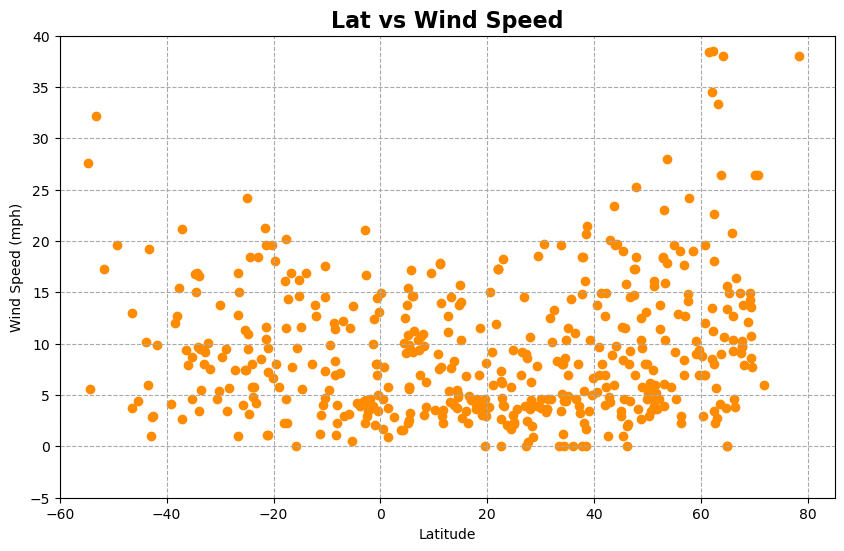

In [199]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.figure(figsize=(10,6))
plt.scatter(city_data_df.Lat, city_data_df["Wind Speed"], color="darkorange")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Lat vs Wind Speed", fontweight="bold", fontsize=16)
plt.xlim((-60, 85))
plt.ylim((-5, 40))
plt.grid(color="darkgrey", alpha=1, linestyle="--")

# Save the figure
plt.savefig("output_data/lat_wind_Childers.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [200]:
# Define a function to create Linear Regression plots
def LinearRegressionPlot(x_values, y_values, y_col, hemisphere, annotate_loc):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Make plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, annotate_loc, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_col}')
    plt.title(f'Latitude vs {y_col} ({hemisphere} Hemisphere)')
    print(f"The r-squared value is: {rvalue**2}")
    plt.show()

In [201]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df.Lat >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,49.50,87.0,100.0,8.05,US,1700671483
2,thompson,55.7435,-97.8558,4.24,72.0,11.0,12.88,CA,1700671989
4,petropavlovsk-kamchatsky,53.0452,158.6483,24.46,73.0,20.0,23.00,RU,1700671989
6,khandyga,62.6667,135.6000,-18.58,100.0,100.0,2.26,RU,1700671990
7,mopti,14.6667,-4.0000,91.44,24.0,0.0,13.80,ML,1700671991


In [202]:
northern_hemi_df.count()

City          332
Lat           332
Lng           332
Max Temp      332
Humidity      332
Cloudiness    332
Wind Speed    332
Country       332
Date          332
dtype: int64

In [203]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df.Lat < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,39.06,80.0,72.0,19.64,TF,1700671988
3,blackmans bay,-43.0167,147.3167,49.53,91.0,23.0,1.01,AU,1700671989
8,grytviken,-54.2811,-36.5092,34.34,100.0,100.0,5.55,GS,1700671991
9,west island,-12.1568,96.8225,78.78,83.0,75.0,13.80,CC,1700671992
10,puerto natales,-51.7236,-72.4875,52.25,40.0,75.0,17.27,CL,1700671992


In [204]:
southern_hemi_df.count()

City          144
Lat           144
Lng           144
Max Temp      144
Humidity      144
Cloudiness    144
Wind Speed    144
Country       141
Date          144
dtype: int64

###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.7488632471386347


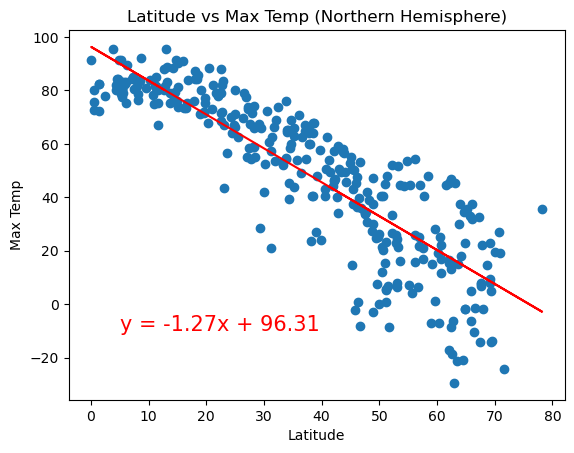

In [231]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

LinearRegressionPlot(x_values, y_values, "Max Temp", "Northern", (5, -10))

The r-squared value is: 0.48626990469683573


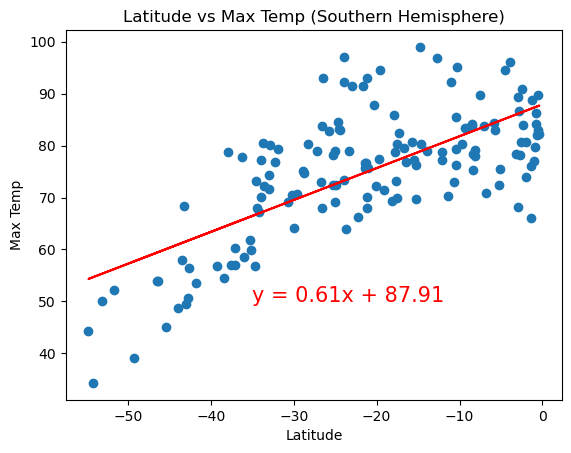

In [206]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

LinearRegressionPlot(x_values, y_values, "Max Temp", "Southern", (-35, 50))

**Discussion about the linear relationship:** This analysis of latitude and maximum temperature for the southern hemisphere shows a moderate correlation/some association between the two data sets due to the r-squared value being  above 0 (r-squared = 0.49). The northern hemisphere r-squared value is 0.75 which depcits a strong correaltion and association between the data sets. There is a strong correlation/association between what the temperature will be based on the latitude. Overall this means that the maximum temperatur is affected by the latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.11129971465912389


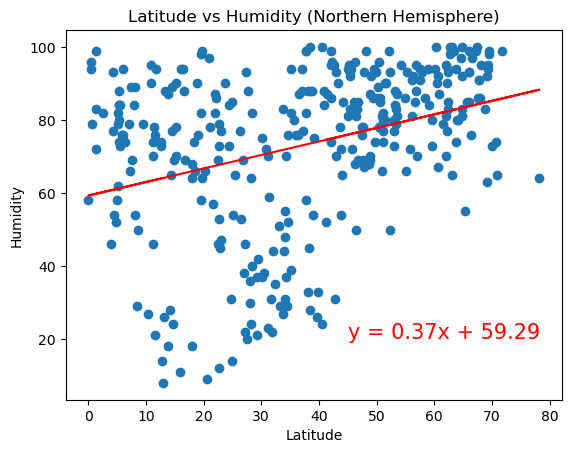

In [230]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

LinearRegressionPlot(x_values, y_values, "Humidity", "Northern", (45, 20))

The r-squared value is: 0.005603593830685782


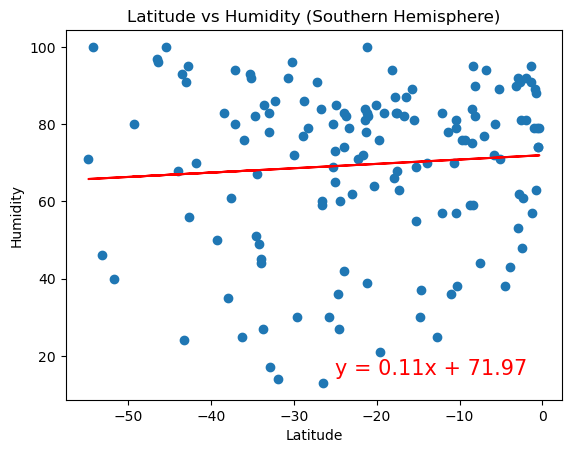

In [227]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

LinearRegressionPlot(x_values, y_values, "Humidity", "Southern", (-25, 15))

**Discussion about the linear relationship:** This analysis of latitude and humidity for the southern hemisphere shows a no correlation/no association between the two data sets due to the r-squared value being  0 (r-squared = 0.01). The northern hemisphere r-squared value is 0.11 which depcits the same thing as the southern hemisphere. There is a weak correlation or no association between the data sets. Overall this means that humidty is not affected by the latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.04859165384726533


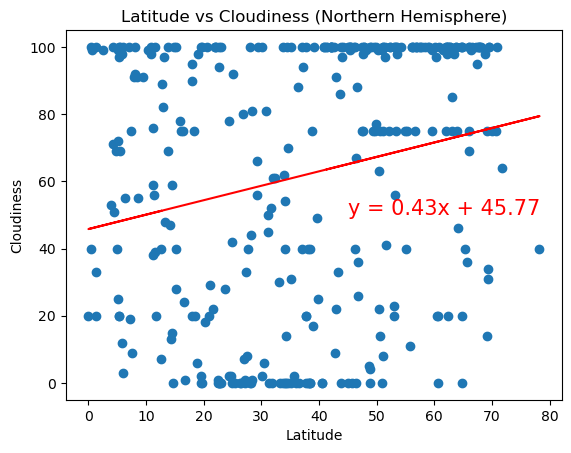

In [221]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

LinearRegressionPlot(x_values, y_values, "Cloudiness", "Northern", (45, 50))

The r-squared value is: 0.017197246280593218


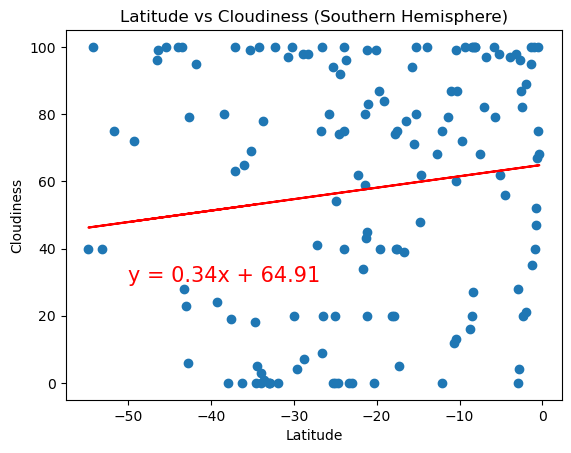

In [218]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

LinearRegressionPlot(x_values, y_values, "Cloudiness", "Southern", (-50, 30))

**Discussion about the linear relationship:** This analysis of latitude and cloudiness for the southern hemisphere shows a very weak correlation and no association between the two data sets due to the r-squared value being near 0 (r-squared = .02). The northern hemisphere r-squared value is 0.05 which depcits the same thing as the southern hemisphere. There is a weak correlation or no association between the data sets. Overall this means that cloudiness is not affected by the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.09417768699851364


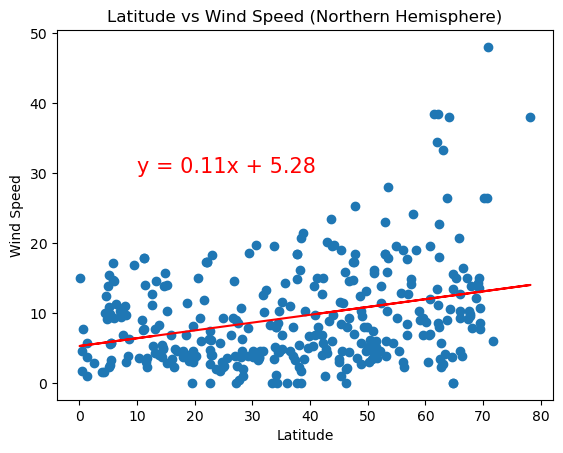

In [214]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

LinearRegressionPlot(x_values, y_values, "Wind Speed", "Northern", (10, 30))

The r-squared value is: 0.05848316291429779


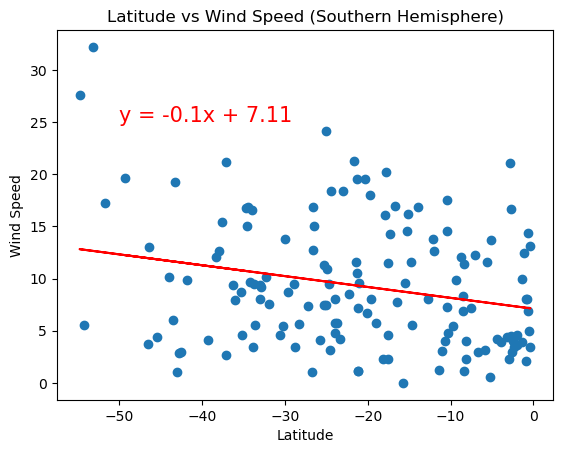

In [213]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

LinearRegressionPlot(x_values, y_values, "Wind Speed", "Southern", (-50, 25))

**Discussion about the linear relationship:** This analysis of latitude and wind speed for the southern hemisphere shows a very weak correlation/no association between the two data sets due to the r-squared value being close to zero (r-squared = .05). The northern hemisphere r-squared value is 0.094 which depcits the same thing as the southern hemisphere. There is a  very weak correlation or no association between the data sets. Overall this means that wind speed is not affected by the latitude.